In [120]:
# All tickets for Sponsor 31
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=closed&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&sponsor=%5ESponsor31-can&or&sponsor=%5ESponsor31-must&col=id&col=summary&col=sponsor&col=status&col=owner&col=type&col=priority&col=milestone&col=component&col=version&col=resolution&col=changetime&col=actualpoints&col=points&col=keywords&order=priority

# I NEED TO FILTER BY network-roadmap keyword but still not doing it because not all tickets in the roadmap are tagged

csv_path='/Users/gaba/Code/torproject/trac/datasets/S31_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)

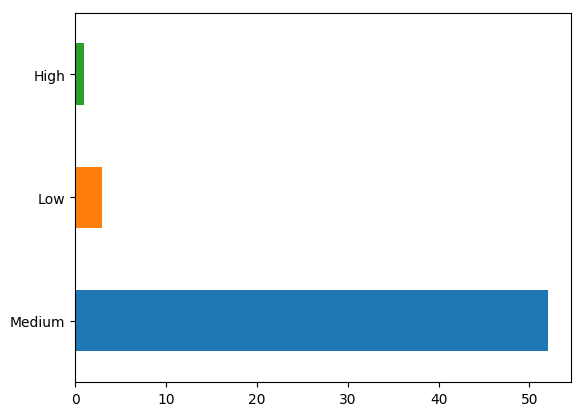

In [63]:
# how is the priority on tickets
csv_file['Priority'].value_counts().plot.barh()

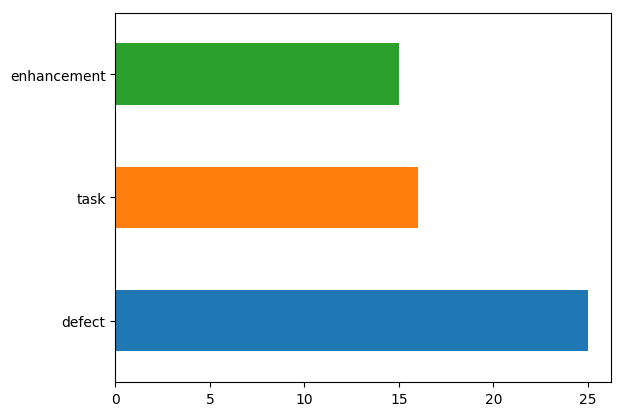

In [64]:
# which type of tickets
csv_file['Type'].value_counts().plot.barh()

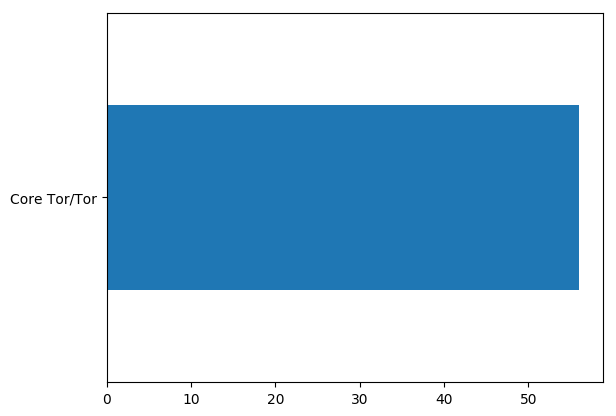

In [65]:

# which components we are changing
csv_file['Component'].value_counts().plot.barh()

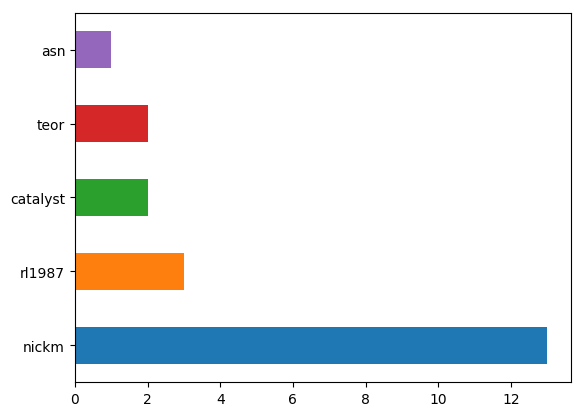

In [66]:
# who is assigned
csv_file['Owner'].value_counts().plot.barh()


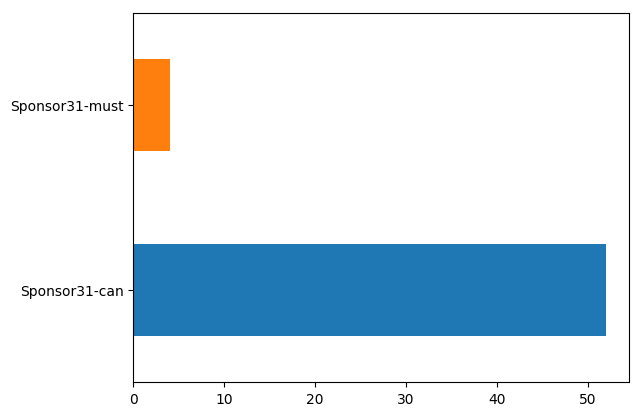

In [67]:
# how many must tickets versus 'can be done'
csv_file['Sponsor'].value_counts().plot.barh()

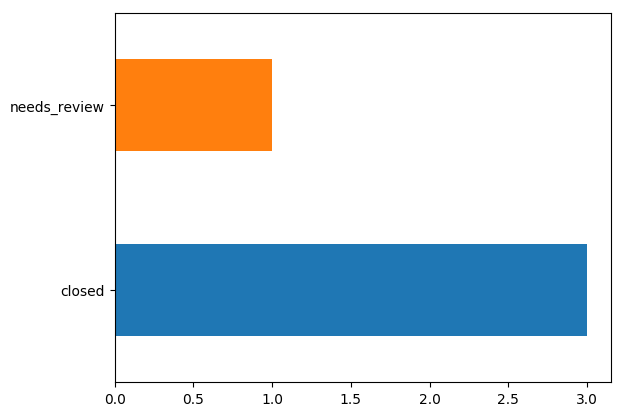

In [68]:
# how many sponsor31-must tickets are already done and how many still need to be finish
csv_file.query('Sponsor=="Sponsor31-must"')['Status'].value_counts().plot.barh()


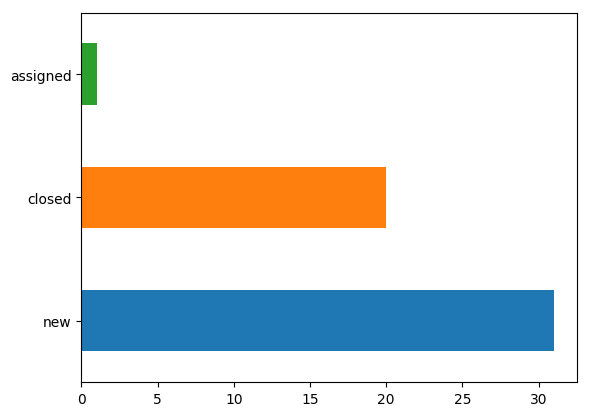

In [69]:
# what about the 'could be done' tickets
csv_file.query('Sponsor=="Sponsor31-can"')['Status'].value_counts().plot.barh()

In [70]:
# are all of the open tickets estimated?
csv_file[csv_file.Points.isnull()].query('Status!="closed"')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Version,Resolution,Modified,Actual Points,Points,Keywords
1,25493,Improve patterns for cleaning up static variab...,Sponsor31-can,new,NaN,enhancement,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,15 ene. 2019 18:36:07,NaN,NaN,"034-triage-20180328, 034-roadmap-subtask, 034-..."
24,29656,describe global initialization in our tinytest...,Sponsor31-can,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,4 mar. 2019 18:34:33,NaN,NaN,developer-doc
25,29746,Improve Tor best practices tracker,Sponsor31-can,new,NaN,defect,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,13 mar. 2019 17:21:56,NaN,NaN,"practracker, tech-debt, refactoring, easy"
33,29895,avoid storing ints in void* in mainloop event ...,Sponsor31-can,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,25 mar. 2019 20:38:55,NaN,NaN,"portability, technical-debt"
46,30292,Refactor periodic event system so each subsyst...,Sponsor31-can,assigned,nickm,enhancement,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,25 abr. 2019 19:02:45,NaN,NaN,NaN


In [126]:
# how many points still need to be done
points_to_go = csv_file.query('Status!="closed"').filter(['Points']).sum()

points_to_go/3 # thinking 3 days per week for 1 developer

# starting June: we have until december:  24 semanas  ---> We will need at least 2.5 developers to complete all open tickets in this sponsor

Points    53.733333
dtype: float64